In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mergeddataset.csv')

In [3]:
df = df.rename(columns = {'Unnamed: 0':'ID'})

In [4]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

In [5]:
keepcol=['ID','school','schoolsup.x','traveltime.x', 'studytime.x','paid.x', 'activities.x','higher.x','freetime.x','goout.x','health.x','romantic.x','Dalc.x','Walc.x','schoolsup.y','traveltime.y', 'studytime.y','paid.y', 'activities.y','higher.y','freetime.y','goout.y','health.y','romantic.y','Dalc.y','Walc.y','G1.y', 'G2.y', 'G3.y','G1.x', 'G2.x', 'G3.x']

In [6]:
fildf = df.loc[:,keepcol]

In [7]:
xfeatures = ['ID','schoolsup.x','traveltime.x', 'studytime.x','paid.x','activities.x','higher.x','freetime.x','goout.x','health.x','romantic.x','Dalc.x','Walc.x','G1.x', 'G2.x', 'G3.x']

In [8]:
yfeatures = ['ID','schoolsup.y','traveltime.y', 'studytime.y','paid.y','activities.y','higher.y','freetime.y','goout.y','health.y','romantic.y','Dalc.y','Walc.y','G1.y', 'G2.y', 'G3.y']

In [9]:
fildf_x = fildf.loc[:,xfeatures]

In [10]:
fildf_y = fildf.loc[:,yfeatures]

In [11]:
fildf_x = fildf_x.set_index('ID')
fildf_y = fildf_y.set_index('ID')

In [12]:
fildf_x.columns

Index(['schoolsup.x', 'traveltime.x', 'studytime.x', 'paid.x', 'activities.x',
       'higher.x', 'freetime.x', 'goout.x', 'health.x', 'romantic.x', 'Dalc.x',
       'Walc.x', 'G1.x', 'G2.x', 'G3.x'],
      dtype='object')

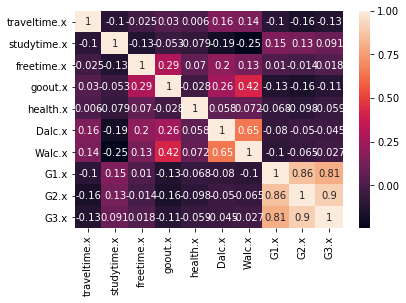

In [13]:
sns1 = fildf_x.corr()
sn.heatmap(sns1, annot=True)
plt.show()

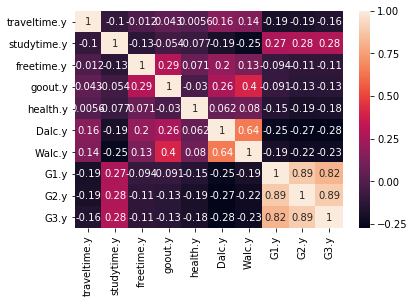

In [14]:
sns2 = fildf_y.corr()
sn.heatmap(sns2, annot=True)
plt.show()

In [15]:
#sn.pairplot(fildf_x)

In [16]:
fildf_x.dtypes

schoolsup.x     object
traveltime.x     int64
studytime.x      int64
paid.x          object
activities.x    object
higher.x        object
freetime.x       int64
goout.x          int64
health.x         int64
romantic.x      object
Dalc.x           int64
Walc.x           int64
G1.x             int64
G2.x             int64
G3.x             int64
dtype: object

In [17]:
label_encoder = preprocessing.LabelEncoder()

In [18]:
fildf_x

,schoolsup.x,traveltime.x,studytime.x,paid.x,activities.x,higher.x,freetime.x,goout.x,health.x,romantic.x,Dalc.x,Walc.x,G1.x,G2.x,G3.x
ID,,,,,,,,,,,,,,,
1,yes,2,4,yes,yes,yes,1,2,1,no,1,1,7,10,10
2,yes,1,2,no,no,yes,3,4,5,yes,2,4,8,6,5
3,yes,1,1,yes,yes,yes,3,1,2,no,1,1,14,13,13
4,yes,1,3,yes,yes,yes,3,2,5,no,1,1,10,9,8
5,no,2,3,yes,yes,yes,2,1,3,yes,2,3,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,no,1,1,no,no,no,3,3,3,yes,2,3,8,7,8
379,no,2,3,yes,no,yes,2,2,5,yes,2,2,13,13,13
380,no,3,1,no,no,yes,4,4,5,no,3,3,8,8,8


In [19]:
fildf_x['schoolsup.x']= label_encoder.fit_transform(fildf_x['schoolsup.x'])
fildf_x['paid.x']= label_encoder.fit_transform(fildf_x['paid.x'])
fildf_x['activities.x']= label_encoder.fit_transform(fildf_x['activities.x'])
fildf_x['higher.x']= label_encoder.fit_transform(fildf_x['higher.x'])
fildf_x['romantic.x']= label_encoder.fit_transform(fildf_x['romantic.x'])

In [20]:
fildf_x

,schoolsup.x,traveltime.x,studytime.x,paid.x,activities.x,higher.x,freetime.x,goout.x,health.x,romantic.x,Dalc.x,Walc.x,G1.x,G2.x,G3.x
ID,,,,,,,,,,,,,,,
1,1,2,4,1,1,1,1,2,1,0,1,1,7,10,10
2,1,1,2,0,0,1,3,4,5,1,2,4,8,6,5
3,1,1,1,1,1,1,3,1,2,0,1,1,14,13,13
4,1,1,3,1,1,1,3,2,5,0,1,1,10,9,8
5,0,2,3,1,1,1,2,1,3,1,2,3,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,1,1,0,0,0,3,3,3,1,2,3,8,7,8
379,0,2,3,1,0,1,2,2,5,1,2,2,13,13,13
380,0,3,1,0,0,1,4,4,5,0,3,3,8,8,8


In [21]:
fildf_y['schoolsup.y']= label_encoder.fit_transform(fildf_y['schoolsup.y'])
fildf_y['paid.y']= label_encoder.fit_transform(fildf_y['paid.y'])
fildf_y['activities.y']= label_encoder.fit_transform(fildf_y['activities.y'])
fildf_y['higher.y']= label_encoder.fit_transform(fildf_y['higher.y'])
fildf_y['romantic.y']= label_encoder.fit_transform(fildf_y['romantic.y'])

In [22]:
def convertmarks(mark):
    if mark<10:
        return 'A'
    else:
        return 'B'

In [23]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [24]:
newlist=[]
for i in fildf_x['G2.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G2'] = newlist

In [25]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [26]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [27]:
newlist=[]
for i in fildf_y['G2.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G2'] = newlist

In [28]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [29]:
fildf_y

,schoolsup.y,traveltime.y,studytime.y,paid.y,activities.y,higher.y,freetime.y,goout.y,health.y,romantic.y,Dalc.y,Walc.y,G1.y,G2.y,G3.y,New G1,New G2,New G3
ID,,,,,,,,,,,,,,,,,,
1,1,2,4,1,1,1,1,2,1,0,1,1,13,13,13,B,B,B
2,1,1,2,0,0,1,3,4,5,1,2,4,13,11,11,B,B,B
3,1,1,1,0,1,1,3,1,2,0,1,1,14,13,12,B,B,B
4,1,1,3,0,1,1,3,2,5,0,1,1,10,11,10,B,B,B
5,0,2,3,1,1,1,2,1,3,1,2,3,13,13,13,B,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,1,1,0,0,0,3,3,3,1,2,3,9,10,9,A,B,A
379,0,2,3,0,0,1,2,2,5,1,2,2,15,16,16,B,B,B
380,0,3,1,0,0,1,4,4,5,0,3,3,8,9,10,A,A,B


In [30]:
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_y['New G2']= label_encoder.fit_transform(fildf_y['New G2'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [31]:
fildf_y

,schoolsup.y,traveltime.y,studytime.y,paid.y,activities.y,higher.y,freetime.y,goout.y,health.y,romantic.y,Dalc.y,Walc.y,G1.y,G2.y,G3.y,New G1,New G2,New G3
ID,,,,,,,,,,,,,,,,,,
1,1,2,4,1,1,1,1,2,1,0,1,1,13,13,13,1,1,1
2,1,1,2,0,0,1,3,4,5,1,2,4,13,11,11,1,1,1
3,1,1,1,0,1,1,3,1,2,0,1,1,14,13,12,1,1,1
4,1,1,3,0,1,1,3,2,5,0,1,1,10,11,10,1,1,1
5,0,2,3,1,1,1,2,1,3,1,2,3,13,13,13,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0,1,1,0,0,0,3,3,3,1,2,3,9,10,9,0,1,0
379,0,2,3,0,0,1,2,2,5,1,2,2,15,16,16,1,1,1
380,0,3,1,0,0,1,4,4,5,0,3,3,8,9,10,0,0,1


In [32]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_x['New G2']= label_encoder.fit_transform(fildf_x['New G2'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])

In [33]:
fildf_x = fildf_x.drop(['G1.x','G2.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G2.y','G3.y'],axis=1)

In [34]:
features_x_G1 = fildf_x.drop(['New G1','New G2','New G3'],axis=1)
features_x_G2 = fildf_x.drop(['New G2','New G3'],axis=1)
features_x_G3 = fildf_x.drop(['New G3'],axis=1)

In [35]:
features_y_G1 = fildf_y.drop(['New G1','New G2','New G3'],axis=1)
features_y_G2 = fildf_y.drop(['New G2','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G3'],axis=1)

In [36]:
target_x_G1 = fildf_x['New G1']
target_x_G2 = fildf_x['New G2']
target_x_G3 = fildf_x['New G3']

In [37]:
target_y_G1 = fildf_y['New G1']
target_y_G2 = fildf_y['New G2']
target_y_G3 = fildf_x['New G3']

In [38]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=42)
X_train_x_G2, X_test_x_G2, y_train_x_G2, y_test_x_G2 = train_test_split(features_x_G2, target_x_G2, test_size=0.25, random_state=42)
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=42)

In [39]:
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=42)
X_train_y_G2, X_test_y_G2, y_train_y_G2, y_test_y_G2 = train_test_split(features_y_G2, target_y_G2, test_size=0.25, random_state=42)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=42)

## Gaussian Naive Bayes

In [40]:
clf = GaussianNB()

In [42]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = clf.predict(X_test_x_G1)
y_pred_x_G1_prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
#plt.plot(y_pred_x_G1_prob)

              precision    recall  f1-score   support

           0       0.34      0.61      0.44        18
           1       0.89      0.73      0.80        78

    accuracy                           0.71        96
   macro avg       0.62      0.67      0.62        96
weighted avg       0.79      0.71      0.73        96

Kappa Score: 0.26315789473684215


In [43]:
clf.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = clf.predict(X_test_x_G2)
print(classification_report(y_pred_x_G2,y_test_x_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G2,y_test_x_G2)))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.87      0.89      0.88        61

    accuracy                           0.84        96
   macro avg       0.83      0.83      0.83        96
weighted avg       0.84      0.84      0.84        96

Kappa Score: 0.6606974552309143


In [44]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        33
           1       0.88      0.94      0.91        63

    accuracy                           0.88        96
   macro avg       0.87      0.85      0.86        96
weighted avg       0.87      0.88      0.87        96

Kappa Score: 0.7147102526002972


In [45]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.47      0.70      0.56        10
           1       0.96      0.91      0.93        86

    accuracy                           0.89        96
   macro avg       0.71      0.80      0.75        96
weighted avg       0.91      0.89      0.90        96

Kappa Score: 0.4971428571428571


In [46]:
clf.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = clf.predict(X_test_y_G2)
print(classification_report(y_pred_y_G2,y_test_y_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G2,y_test_y_G2)))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.94      0.99      0.96        81

    accuracy                           0.94        96
   macro avg       0.93      0.83      0.87        96
weighted avg       0.94      0.94      0.93        96

Kappa Score: 0.7340720221606648


In [47]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.31      0.56      0.40        16
           1       0.90      0.75      0.82        80

    accuracy                           0.72        96
   macro avg       0.60      0.66      0.61        96
weighted avg       0.80      0.72      0.75        96

Kappa Score: 0.23584905660377364


## Decision Tree Classifier 

In [48]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.41      0.37      0.39        35
           1       0.66      0.69      0.67        61

    accuracy                           0.57        96
   macro avg       0.53      0.53      0.53        96
weighted avg       0.57      0.57      0.57        96

Kappa Score: 0.06106870229007633
	
Feature Walc.x and its importance is 0.14679820691560477
Feature health.x and its importance is 0.14002589565663165
Feature goout.x and its importance is 0.13261187921040288
Feature freetime.x and its importance is 0.11235248754222596
Feature romantic.x and its importance is 0.10884534213185901
Feature traveltime.x and its importance is 0.09166214130438749
Feature studytime.x and its importance is 0.08677550955338836
Feature paid.x and its importance is 0.04826836824339946
Feature activities.x and its importance is 0.04771845686102186
Feature higher.x and its importance is 0.03869883853617684
Feature schoolsup.x and its importance

([<matplotlib.axis.XTick at 0x7fe741319b50>,
 <a list of 12 Text xticklabel objects>)

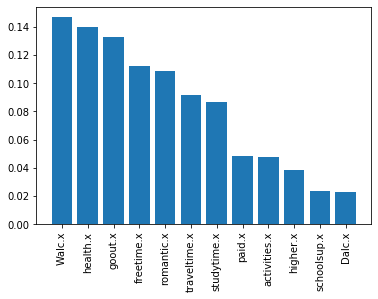

In [49]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.56      0.53      0.54        36
           1       0.73      0.75      0.74        60

    accuracy                           0.67        96
   macro avg       0.64      0.64      0.64        96
weighted avg       0.66      0.67      0.66        96

Kappa Score: 0.2808988764044944
	
Feature New G1 and its importance is 0.5161516853932585
Feature freetime.x and its importance is 0.06460568390005221
Feature goout.x and its importance is 0.06276669036921632
Feature health.x and its importance is 0.058271053207132745
Feature traveltime.x and its importance is 0.05331131032980029
Feature Walc.x and its importance is 0.04652929456906728
Feature studytime.x and its importance is 0.04639883825151683
Feature Dalc.x and its importance is 0.04607420019005392
Feature schoolsup.x and its importance is 0.02969511289364232
Feature paid.x and its importance is 0.0274621212121212
Feature activities.x and its importance is 0.02

([<matplotlib.axis.XTick at 0x7fe73fe780d0>,
 <a list of 13 Text xticklabel objects>)

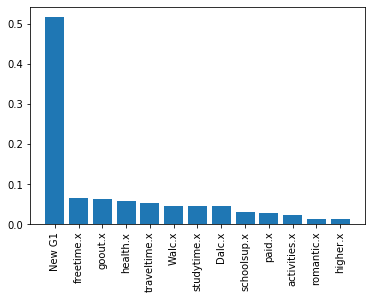

In [50]:
imp_dict={}
dtc.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = dtc.predict(X_test_x_G2)
print(classification_report(y_pred_x_G2,y_test_x_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G2,y_test_x_G2)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G2.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.94      0.91      0.93        69

    accuracy                           0.90        96
   macro avg       0.87      0.88      0.87        96
weighted avg       0.90      0.90      0.90        96

Kappa Score: 0.7480314960629921
	
Feature New G2 and its importance is 0.6516622340425532
Feature Walc.x and its importance is 0.05450632380611822
Feature goout.x and its importance is 0.045504009607895864
Feature health.x and its importance is 0.035943747303272315
Feature freetime.x and its importance is 0.03590751418844264
Feature New G1 and its importance is 0.030541053053773873
Feature romantic.x and its importance is 0.028028055193708688
Feature studytime.x and its importance is 0.02608765137260578
Feature traveltime.x and its importance is 0.025193329611479867
Feature paid.x and its importance is 0.021692146246253572
Feature Dalc.x and its importance is 0.017

([<matplotlib.axis.XTick at 0x7fe73deb0c90>,
 <a list of 14 Text xticklabel objects>)

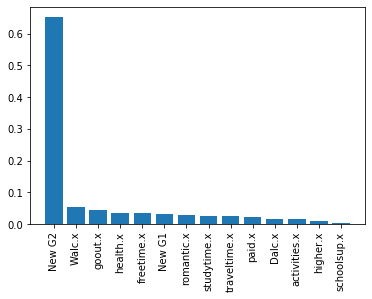

In [51]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.33      0.31      0.32        16
           1       0.86      0.88      0.87        80

    accuracy                           0.78        96
   macro avg       0.60      0.59      0.60        96
weighted avg       0.78      0.78      0.78        96

Kappa Score: 0.1923076923076923
	
Feature higher.y and its importance is 0.1811017745243912
Feature Walc.y and its importance is 0.14663227141172852
Feature freetime.y and its importance is 0.13767194621216894
Feature goout.y and its importance is 0.12786881828459276
Feature studytime.y and its importance is 0.09239441600090618
Feature traveltime.y and its importance is 0.09109544842670714
Feature health.y and its importance is 0.05872040473402935
Feature paid.y and its importance is 0.05415794479151029
Feature activities.y and its importance is 0.0384834370311502
Feature romantic.y and its importance is 0.030071964848639245
Feature schoolsup.y and its importance i

([<matplotlib.axis.XTick at 0x7fe740fdd450>,
 <a list of 12 Text xticklabel objects>)

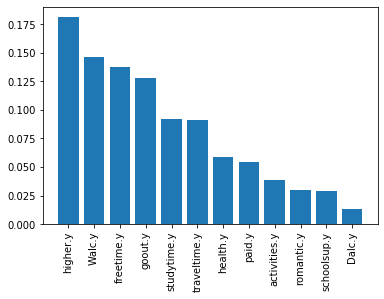

In [52]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.73      0.36      0.48        22
           1       0.84      0.96      0.89        74

    accuracy                           0.82        96
   macro avg       0.78      0.66      0.69        96
weighted avg       0.81      0.82      0.80        96

Kappa Score: 0.3919523099850969
	
Feature New G1 and its importance is 0.32218046476991047
Feature health.y and its importance is 0.1122211418541867
Feature traveltime.y and its importance is 0.08456499182209148
Feature higher.y and its importance is 0.08294528573609294
Feature Walc.y and its importance is 0.0822285578550185
Feature goout.y and its importance is 0.07327539205086268
Feature studytime.y and its importance is 0.06380664042897957
Feature freetime.y and its importance is 0.05873000601723684
Feature romantic.y and its importance is 0.04609889754465731
Feature schoolsup.y and its importance is 0.02824958566709273
Feature activities.y and its importance is

([<matplotlib.axis.XTick at 0x7fe7410d40d0>,
 <a list of 13 Text xticklabel objects>)

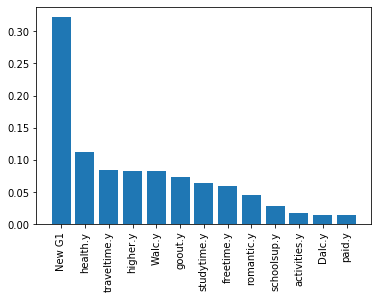

In [53]:
imp_dict={}
dtc.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = dtc.predict(X_test_y_G2)
print(classification_report(y_pred_y_G2,y_test_y_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G2,y_test_y_G2)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G2.columns),reverse=True):
        imp_dict[name] = importance
        print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.41      0.33      0.37        36
           1       0.64      0.72      0.68        60

    accuracy                           0.57        96
   macro avg       0.53      0.53      0.52        96
weighted avg       0.56      0.57      0.56        96

Kappa Score: 0.052023121387283267
	
Feature goout.y and its importance is 0.1383864401511176
Feature New G2 and its importance is 0.1276519617356398
Feature Walc.y and its importance is 0.11876963052674822
Feature health.y and its importance is 0.10357067453405089
Feature studytime.y and its importance is 0.09166555276969371
Feature schoolsup.y and its importance is 0.07742455061094412
Feature romantic.y and its importance is 0.059191662658060584
Feature traveltime.y and its importance is 0.05748998077918816
Feature Dalc.y and its importance is 0.057484090950531516
Feature freetime.y and its importance is 0.04162369155483894
Feature higher.y and its importance is 0

([<matplotlib.axis.XTick at 0x7fe740ae6150>,
 <a list of 14 Text xticklabel objects>)

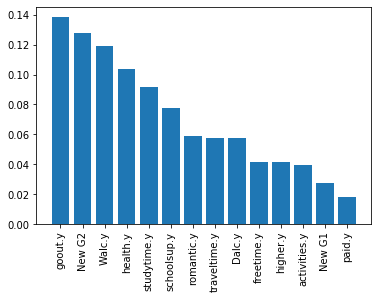

In [54]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

## Random Forest Classifier 

In [55]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.34      0.42      0.38        26
           1       0.77      0.70      0.73        70

    accuracy                           0.62        96
   macro avg       0.55      0.56      0.56        96
weighted avg       0.65      0.62      0.64        96

Kappa Score: 0.11475409836065564
	
Feature goout.x and its importance is 0.12637716415827707
Feature health.x and its importance is 0.12370763360211397
Feature freetime.x and its importance is 0.12207069005502336
Feature Walc.x and its importance is 0.11519049479659312
Feature studytime.x and its importance is 0.10880863113512451
Feature traveltime.x and its importance is 0.08324581448918478
Feature Dalc.x and its importance is 0.06876161613885491
Feature paid.x and its importance is 0.06105698060351478
Feature activities.x and its importance is 0.05969264100331598
Feature romantic.x and its importance is 0.05142986718557033
Feature schoolsup.x and its importance i

([<matplotlib.axis.XTick at 0x7fe741275310>,
 <a list of 12 Text xticklabel objects>)

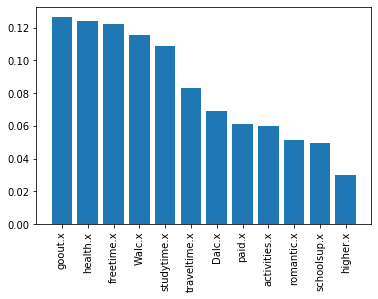

In [56]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        30
           1       0.90      0.85      0.88        66

    accuracy                           0.83        96
   macro avg       0.80      0.82      0.81        96
weighted avg       0.84      0.83      0.84        96

Kappa Score: 0.6257309941520468
	
Feature New G1 and its importance is 0.4252294472024619
Feature goout.x and its importance is 0.10094070462743962
Feature health.x and its importance is 0.07727858895627515
Feature studytime.x and its importance is 0.061027924939296055
Feature Walc.x and its importance is 0.05938155280432385
Feature freetime.x and its importance is 0.057662127906947844
Feature traveltime.x and its importance is 0.04605495797144808
Feature Dalc.x and its importance is 0.04020212944828391
Feature activities.x and its importance is 0.03241681731994667
Feature romantic.x and its importance is 0.028726728348443656
Feature paid.x and its importance is 0.

([<matplotlib.axis.XTick at 0x7fe7415bd110>,
 <a list of 13 Text xticklabel objects>)

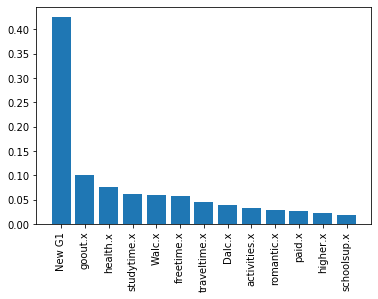

In [57]:
imp_dict={}
rf.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = rf.predict(X_test_x_G2)
print(classification_report(y_pred_x_G2,y_test_x_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G2,y_test_x_G2)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G2.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86        34
           1       0.90      0.97      0.93        62

    accuracy                           0.91        96
   macro avg       0.91      0.88      0.89        96
weighted avg       0.91      0.91      0.90        96

Kappa Score: 0.788027477919529
	
Feature New G2 and its importance is 0.37856157097979243
Feature New G1 and its importance is 0.19581184274284402
Feature goout.x and its importance is 0.06864880664140242
Feature health.x and its importance is 0.04816787041323204
Feature Walc.x and its importance is 0.0475254920907609
Feature freetime.x and its importance is 0.0438708049799196
Feature traveltime.x and its importance is 0.03941977759337133
Feature Dalc.x and its importance is 0.03569701023429806
Feature studytime.x and its importance is 0.030525249408629822
Feature romantic.x and its importance is 0.02591640800602997
Feature higher.x and its importance is 0.02376400

([<matplotlib.axis.XTick at 0x7fe7416db6d0>,
 <a list of 14 Text xticklabel objects>)

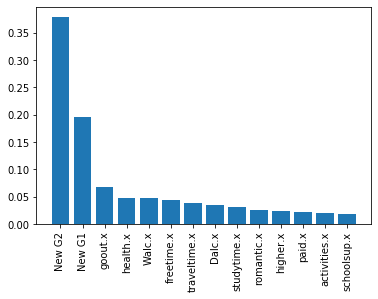

In [58]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       1.00      0.89      0.94        91

    accuracy                           0.90        96
   macro avg       0.67      0.95      0.72        96
weighted avg       0.97      0.90      0.92        96

Kappa Score: 0.4576271186440678
	
Feature higher.y and its importance is 0.13318538569120544
Feature freetime.y and its importance is 0.1317426079985555
Feature studytime.y and its importance is 0.11895166613412082
Feature health.y and its importance is 0.1118385968712346
Feature goout.y and its importance is 0.10567366878126287
Feature Walc.y and its importance is 0.10480593973059149
Feature traveltime.y and its importance is 0.07370281303571692
Feature Dalc.y and its importance is 0.0660368938914359
Feature romantic.y and its importance is 0.04444823710835127
Feature activities.y and its importance is 0.0421409375268291
Feature paid.y and its importance is 0.0343

([<matplotlib.axis.XTick at 0x7fe7417e6690>,
 <a list of 12 Text xticklabel objects>)

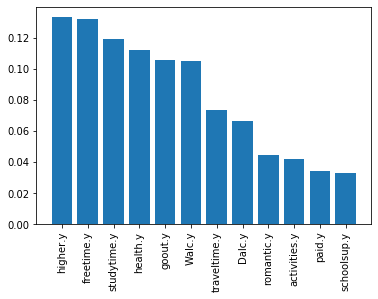

In [59]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.95      0.98      0.96        83

    accuracy                           0.94        96
   macro avg       0.89      0.83      0.86        96
weighted avg       0.93      0.94      0.94        96

Kappa Score: 0.7145688800792864
	
Feature New G1 and its importance is 0.204828847341463
Feature Walc.y and its importance is 0.1022670615172752
Feature goout.y and its importance is 0.10012877969884373
Feature higher.y and its importance is 0.09089237256691028
Feature freetime.y and its importance is 0.09083416159925596
Feature health.y and its importance is 0.08567613201613586
Feature studytime.y and its importance is 0.07526073737298435
Feature Dalc.y and its importance is 0.0719334332938335
Feature traveltime.y and its importance is 0.0546264504372445
Feature romantic.y and its importance is 0.045553981076848514
Feature activities.y and its importance is 0.0390

([<matplotlib.axis.XTick at 0x7fe7418f2810>,
 <a list of 13 Text xticklabel objects>)

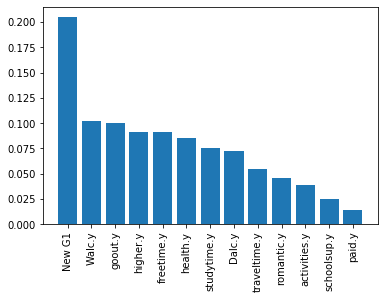

In [60]:
imp_dict={}
rf.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = rf.predict(X_test_y_G2)
print(classification_report(y_pred_y_G2,y_test_y_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G2,y_test_y_G2)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G2.columns),reverse=True):
        imp_dict[name] = importance
        print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.52      0.54      0.53        28
           1       0.81      0.79      0.80        68

    accuracy                           0.72        96
   macro avg       0.66      0.66      0.66        96
weighted avg       0.72      0.72      0.72        96

Kappa Score: 0.3264033264033265
	
Feature goout.y and its importance is 0.1352854335207547
Feature freetime.y and its importance is 0.11616521434529968
Feature health.y and its importance is 0.1141447495879938
Feature Walc.y and its importance is 0.10967720885968946
Feature studytime.y and its importance is 0.08934309199335339
Feature New G2 and its importance is 0.08035608998910006
Feature Dalc.y and its importance is 0.06185836965915466
Feature traveltime.y and its importance is 0.0615100814259626
Feature New G1 and its importance is 0.04830957857837482
Feature romantic.y and its importance is 0.047258203136865955
Feature activities.y and its importance is 0.0432

([<matplotlib.axis.XTick at 0x7fe741a03e10>,
 <a list of 14 Text xticklabel objects>)

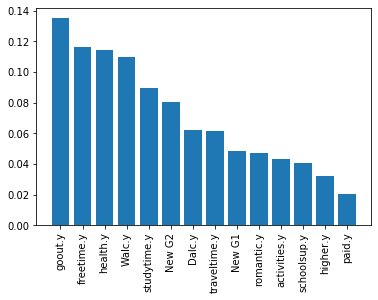

In [61]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

## Linear Kernel SVM 

In [62]:
lsvm = LinearSVC(max_iter=10000)

In [63]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.34      0.73      0.47        15
           1       0.94      0.74      0.83        81

    accuracy                           0.74        96
   macro avg       0.64      0.74      0.65        96
weighted avg       0.84      0.74      0.77        96

Kappa Score: 0.32432432432432434


In [64]:
lsvm.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = lsvm.predict(X_test_x_G2)
print(classification_report(y_pred_x_G2,y_test_x_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G2,y_test_x_G2)))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.90      0.88      0.89        64

    accuracy                           0.85        96
   macro avg       0.83      0.84      0.84        96
weighted avg       0.86      0.85      0.86        96

Kappa Score: 0.676923076923077


In [65]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.90      0.95      0.92        63

    accuracy                           0.90        96
   macro avg       0.90      0.87      0.88        96
weighted avg       0.90      0.90      0.89        96

Kappa Score: 0.7622585438335809


In [66]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.27      1.00      0.42         4
           1       1.00      0.88      0.94        92

    accuracy                           0.89        96
   macro avg       0.63      0.94      0.68        96
weighted avg       0.97      0.89      0.91        96

Kappa Score: 0.3802816901408451


In [67]:
lsvm.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = lsvm.predict(X_test_y_G2)
print(classification_report(y_pred_y_G2,y_test_y_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G2,y_test_y_G2)))

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.94      0.98      0.96        82

    accuracy                           0.93        96
   macro avg       0.88      0.81      0.84        96
weighted avg       0.92      0.93      0.92        96

Kappa Score: 0.6787762906309751


In [68]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.28      0.50      0.36        16
           1       0.88      0.74      0.80        80

    accuracy                           0.70        96
   macro avg       0.58      0.62      0.58        96
weighted avg       0.78      0.70      0.73        96

Kappa Score: 0.179245283018868


## Logistic Regression 

In [69]:
lg = LogisticRegression(random_state=0)

In [70]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.31      0.77      0.44        13
           1       0.95      0.73      0.83        83

    accuracy                           0.74        96
   macro avg       0.63      0.75      0.64        96
weighted avg       0.87      0.74      0.78        96

Kappa Score: 0.3119266055045872


In [71]:
lg.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = lg.predict(X_test_x_G2)
print(classification_report(y_pred_x_G2,y_test_x_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G2,y_test_x_G2)))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        32
           1       0.90      0.88      0.89        64

    accuracy                           0.85        96
   macro avg       0.83      0.84      0.84        96
weighted avg       0.86      0.85      0.86        96

Kappa Score: 0.676923076923077


In [72]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.91      0.95      0.93        64

    accuracy                           0.91        96
   macro avg       0.90      0.88      0.89        96
weighted avg       0.91      0.91      0.91        96

Kappa Score: 0.784


In [73]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         3
           1       1.00      0.87      0.93        93

    accuracy                           0.88        96
   macro avg       0.60      0.94      0.63        96
weighted avg       0.97      0.88      0.91        96

Kappa Score: 0.29670329670329665


In [74]:
lg.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = lg.predict(X_test_y_G2)
print(classification_report(y_pred_y_G2,y_test_y_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G2,y_test_y_G2)))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.95      0.98      0.96        83

    accuracy                           0.94        96
   macro avg       0.89      0.83      0.86        96
weighted avg       0.93      0.94      0.94        96

Kappa Score: 0.7145688800792864


In [75]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.28      0.50      0.36        16
           1       0.88      0.74      0.80        80

    accuracy                           0.70        96
   macro avg       0.58      0.62      0.58        96
weighted avg       0.78      0.70      0.73        96

Kappa Score: 0.179245283018868


## Gradient Boosting Classifier 

In [76]:
gb = GradientBoostingClassifier(random_state=0)

In [77]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.31      0.43      0.36        23
           1       0.80      0.70      0.74        73

    accuracy                           0.64        96
   macro avg       0.55      0.57      0.55        96
weighted avg       0.68      0.64      0.65        96

Kappa Score: 0.11764705882352933


In [78]:
gb.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = gb.predict(X_test_x_G2)
print(classification_report(y_pred_x_G2,y_test_x_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G2,y_test_x_G2)))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        34
           1       0.84      0.84      0.84        62

    accuracy                           0.79        96
   macro avg       0.77      0.77      0.77        96
weighted avg       0.79      0.79      0.79        96

Kappa Score: 0.5445920303605313


In [79]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.90      0.94      0.92        64

    accuracy                           0.89        96
   macro avg       0.88      0.86      0.87        96
weighted avg       0.88      0.89      0.88        96

Kappa Score: 0.736


In [80]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.27      0.57      0.36         7
           1       0.96      0.88      0.92        89

    accuracy                           0.85        96
   macro avg       0.61      0.72      0.64        96
weighted avg       0.91      0.85      0.88        96

Kappa Score: 0.2933753943217665


In [81]:
gb.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = gb.predict(X_test_y_G2)
print(classification_report(y_pred_y_G2,y_test_y_G2))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G2,y_test_y_G2)))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67        13
           1       0.94      0.96      0.95        83

    accuracy                           0.92        96
   macro avg       0.83      0.79      0.81        96
weighted avg       0.91      0.92      0.91        96

Kappa Score: 0.6194251734390486


In [82]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.31      0.45      0.37        20
           1       0.84      0.74      0.78        76

    accuracy                           0.68        96
   macro avg       0.57      0.59      0.58        96
weighted avg       0.73      0.68      0.70        96

Kappa Score: 0.16027088036117376
